In [36]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [37]:
df = pd.read_csv('2017_Offense_Description_Type_Count.csv')
df.head()


#offense_zip = pd.read_csv('CSVs/zip cut offe KCPD_Crime_Data_2017.csv')
#offense_zip.head()

,Offense,Description,Type,Count
0,101,Homicide/Non Neglige,Violent,183
1,121,Justifiable Homicide,Violent,14
2,201,Rape,Violent,655
3,210,Forcible Sodomy,Violent,384
4,220,Sexual Assault with,Violent,4


101

## Data Observation

In [40]:
# Count how many sightings have occured within each state
#type_counts = test.groupby("Type")
type_counts["Type"].count()


101

In [41]:
# Using GroupBy in order to separate the data into fields according to "state" values
#grouped_df = test.groupby(['Type'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
#print(grouped_df["Type"].count())

# In order to be visualized, a data function must be used...
#grouped_df.count().head(10)

grouped_df[["Count"]].count()

NameError: name 'grouped_df' is not defined

## Data Cleaning

In [27]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this


# X total offense count
# y offense type code


X = df.Count.values.reshape(-1, 1)
y = df.Offense.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X


Shape:  (101, 1) (101, 1)


array([[  183],
       [   14],
       [  655],
       [  384],
       [    4],
       [   17],
       [ 1941],
       [ 4158],
       [ 6958],
       [  689],
       [ 2999],
       [ 8227],
       [ 2288],
       [  153],
       [   99],
       [ 5796],
       [ 9302],
       [ 3988],
       [  160],
       [ 4966],
       [   40],
       [ 4648],
       [ 9281],
       [  891],
       [ 6382],
       [ 8857],
       [   29],
       [ 1593],
       [ 1853],
       [    5],
       [  455],
       [    8],
       [  400],
       [  425],
       [  317],
       [ 1659],
       [ 1141],
       [   52],
       [  373],
       [    4],
       [   83],
       [ 1343],
       [   40],
       [  527],
       [  660],
       [11951],
       [ 1124],
       [   26],
       [   24],
       [  165],
       [  130],
       [    6],
       [  107],
       [   83],
       [   15],
       [   82],
       [  150],
       [  399],
       [    2],
       [  126],
       [ 4888],
       [ 1574],
       [

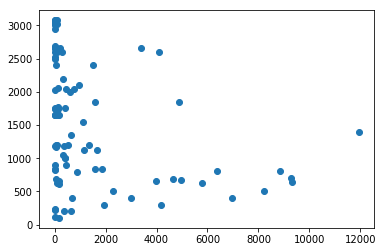

In [28]:
# Plot the data

### BEGIN SOLUTION

plt.scatter(X, y)

### END SOLUTION

## ML Linear Regression

In [30]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [31]:
# Create the model

### BEGIN SOLUTION

from sklearn.linear_model import LinearRegression

model = LinearRegression()

### END SOLUTION

In [32]:
# Fit the model to the training data. 

### BEGIN SOLUTION

model.fit(X_train, y_train)

### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Result

In [42]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

Mean Squared Error (MSE): 1005615.0884743853
R-squared (R2 ): -0.07101389672384628


In [43]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
model.score(X_test, y_test)
### END SOLUTION

-0.07101389672384628

In [44]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

Weight coefficients:  [[-0.18505147]]
y-axis intercept:  [1908.72722523]


In [47]:
# Note: we have to transform our min and max values
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1]]
Max X Value: [[11951]]


In [48]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict(x_max)
### END SOLUTION

Text(0, 0.5, 'Offense Type Code')

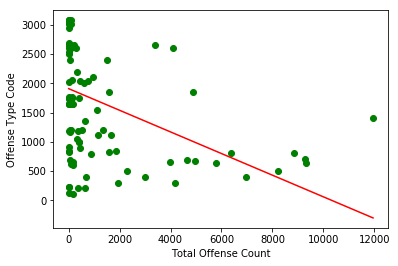

In [49]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

### BEGIN SOLUTION
plt.scatter(X, y, c='green')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

plt.xlabel("Total Offense Count")
plt.ylabel("Offense Type Code")
### END SOLUTION

In [70]:
import seaborn as sns

In [72]:
sns.scatterplot(X, y)

ValueError: If using all scalar values, you must pass an index

In [135]:
training_data = pd.DataFrame({
    "Year":[2017,2016, 2015],
    "Non_Violent":[63,33,99]})
training_data.head(10)

,Year,Non_Violent
0,2017,63
1,2016,33
2,2015,99


In [147]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this


# X total offense count
# y offense type code


X = training_data.Year.values.reshape(-1, 1)
y = training_data.Non_Violent.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (3, 1) (3, 1)


array([[2017],
       [2016],
       [2015]], dtype=int64)

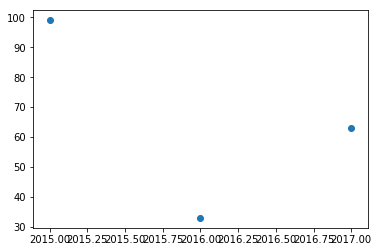

In [148]:
# Plot the data

### BEGIN SOLUTION

plt.scatter(X, y)

### END SOLUTION

In [138]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

### END SOLUTION

In [139]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [140]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

### BEGIN SOLUTION

model.fit(X, y)

### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [141]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

Weight coefficients:  [[-18.]]
y-axis intercept:  [36353.]


In [142]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[2015]]
Max X Value: [[2017]]


In [143]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict(x_max)
### END SOLUTION

Text(0, 0.5, 'Offense Type Code')

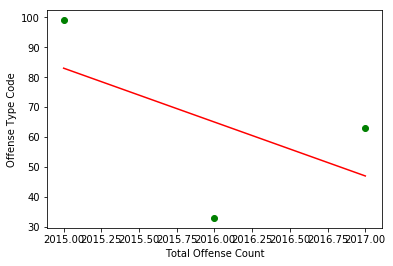

In [144]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

### BEGIN SOLUTION
plt.scatter(X, y, c='green')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

plt.xlabel("Total Offense Count")
plt.ylabel("Offense Type Code")
### END SOLUTION

## Tad's is working on counting types of Crimes by month

In [81]:
df_crime = pd.read_csv("CSVs/KCPD_Crime_Data_2014.csv")

In [82]:
df_crime.head()

,Report_No,Reported_Date,Reported Time,From_Date,From Time,To_Date,To Time,Offense,IBRS,Description,...,Involvement,Race,Sex,Age,Location 1,Firearm Used Flag,Neighborhood Census,Council Districts,County Boundary,Zip Codes
0,140092859,12/28/2014,19:36,12/22/2014,1:00,12/22/2014 0:00,21:30,670,23D,Stealing from Buildi,...,VIC,B,M,45.0,"3300 E 30 ST\nKANSAS CITY 64127\n(39.07141553,...",N,77.0,3.0,7.0,36.0
1,140003100,1/14/2014,12:30,1/12/2014,19:00,1/14/2014 0:00,11:00,702,240,Auto Theft,...,VIC,B,F,20.0,400 HIGHLAND AV\nKANSAS CITY 64106\n(39.110471...,N,135.0,3.0,7.0,75.0
2,140078116,10/28/2014,12:53,10/7/2014,14:00,NaN,NaN,1198,26C,Impersonation,...,VIC,W,F,43.0,"E INDEPENDENCE AV/E WINNER KANSAS CITY, RD 641...",N,123.0,3.0,7.0,19.0
3,140087038,12/4/2014,12:35,12/4/2014,12:35,NaN,NaN,401,13A,Aggravated Assault (,...,VIC,B,M,20.0,83 ST WAYNE AV\nKANSAS CITY 64130\n(39.0333197...,Y,175.0,2.0,7.0,157.0
4,140034949,5/22/2014,12:23,5/22/2014,12:20,5/22/2014 0:00,13:00,1546,520,Weapons Law Violatio,...,VIC,NaN,NaN,NaN,17 ST TOPPING AV\nKANSAS CITY 64127\n(39.08961...,Y,17.0,3.0,7.0,95.0


In [83]:
df_crime = df_crime[['From_Date', 'From Time', 'Offense', 'Race', 'Sex', 'Age']]
df_crime.head()

,From_Date,From Time,Offense,Race,Sex,Age
0,12/22/2014,1:00,670,B,M,45.0
1,1/12/2014,19:00,702,B,F,20.0
2,10/7/2014,14:00,1198,W,F,43.0
3,12/4/2014,12:35,401,B,M,20.0
4,5/22/2014,12:20,1546,NaN,NaN,NaN


### Extracting Month value

In [84]:
date = df_crime["From_Date"]
date.head()

0    12/22/2014
1     1/12/2014
2     10/7/2014
3     12/4/2014
4     5/22/2014
Name: From_Date, dtype: object

In [85]:
date = date.str.split("/", expand=True)

In [86]:
date.columns = ["Month", "Day", "Year"]
date.head()

,Month,Day,Year
0,12,22,2014
1,1,12,2014
2,10,7,2014
3,12,4,2014
4,5,22,2014


In [87]:
df_crime[["Month", "Day", "Year"]] = date
df_crime.head()

,From_Date,From Time,Offense,Race,Sex,Age,Month,Day,Year
0,12/22/2014,1:00,670,B,M,45.0,12,22,2014
1,1/12/2014,19:00,702,B,F,20.0,1,12,2014
2,10/7/2014,14:00,1198,W,F,43.0,10,7,2014
3,12/4/2014,12:35,401,B,M,20.0,12,4,2014
4,5/22/2014,12:20,1546,NaN,NaN,NaN,5,22,2014


In [ ]:
df_crime_month_offense = df_crime[['Offense', '']]

In [96]:
.to_csv(df_offense_month_2014)

AttributeError: module 'pandas' has no attribute 'to_csv'

### Counting Offense by month

In [91]:
df_crime_by_month_Offense = df_crime.groupby(by=["Month", "Offense"]).count()

In [92]:
df_crime_by_month_Offense.head()

From_Date  From Time  Race  Sex  Age  Day  Year
Month Offense                                                 
1     101             14         14    14   14    7   14    14
      201             53         53    53   53   33   53    53
      210             62         62    62   62   24   62    62
      230              2          2     2    2    0    2     2
      301             98         98    97   97   49   98    98

In [93]:
df_crime_by_offense = df_crime.groupby(by=["Offense"]).count()

In [94]:
df_crime_by_offense.head()

,From_Date,From Time,Race,Sex,Age,Month,Day,Year
Offense,,,,,,,,
101,136,138,152,152,81,136,136,136
121,3,3,3,3,2,3,3,3
151,0,0,2,2,1,0,0,0
201,545,545,547,547,322,545,545,545
210,422,413,427,427,191,422,422,422
